<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/13%EA%B0%95_%EB%8C%80%EA%B7%9C%EB%AA%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%90_%EB%8C%80%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1. 데이터의 속성 차원 수와 학습 데이터가 클 경우에 효과적으로 사용할 수 있는 방법을 알아보자
#필기 숫자 인식과 패션이미지 인식. 이들은 28*28에 50000개의 데이터로 이루어짐.
#학습 데이터 차원이 크고 은닉층 계층 구조가 많을 때 효과적으로 사용할 수 있는 방법.
#전체 데이터가 아닌 부분 데이터를 사용해 학습함.
#가중치를 업데이트 하는 과정에서 전체 데이터를 사용할 필요는 없음.
#지금 까지는 전체 데이터를 사용해 가중치를 업데이트 함 (full-batch)
#확률적 경사 하강법: 학습 데이터를 분할해서 가중치 업데이트를 사용.
#이 때 분할된 학습 데이터 셋을 mini-batch라고 함.
#조금만 훑어보고 빠르게 학습 방법을 찾음
#두 방법 모두 데이터를 사용해 오차를 지속적으로 줄여나감.
#많은 데이터를 가진 신경망을 학습할 때 확률적 경사하강법을 사용함.
#한 번 학습에 수행되는 시간을 줄이고 전체 데이터에 대해 반복적으로 학습 수행.
#최적의 값을 찾는 과정에서 전체 데이터에 대한 cost는 올라갈수도 있고 내려갈 수도 있어서
#업데이트가 항상 좋은 방향으로 일어나는 것은 아님.
#현재 데이터에 대해서는 cost가 작아도 다른 데이터에 대해 cost가 클 수 도 있기 때문
#하지만 전체 데이터를 사용하는 경사하강법보다 수렴 속도가 빠르다.
#미니 배치를 이용해 전체 데이터를 분할할 때 두가지 방법을 사용 가능
#1. 전체 데이터를 n개 데이터로 나누어 데이터 중복이 나지 않게 구성
#2. 전체 데이터에서 무작위로 데이터를 샘플링 이 경우 중복 데이터가 발생할 수도 있음.


#2. 과적합의 문제점:
#신경망의 학습 방법을 최적화하기 위해 과적합 문제를 해결해야 함.
#underfitting = 전체 데이터를 잘 설명하지 못하게 되어 아직 학습이 덜 이루어진 현상.
#과적합(over fitting) : 모든 데이터를 다 연결해서, 모든 점에 대해 정확하게 피팅 -> 학습 오류는 0
#학습오차가 0인 상태가 학습이 잘 된 상태일까?
#과적합 : 학습 데이터에 대한 인식률은 높지만 테스트 데이터에 대한 인식률이 낮음
#학습 데이터와 다르거나 멀리 떨어진 데이터 사용아게 되면 성능이 급격히 떨어짐(일반화 성능이 좋지 않음)
#어느 정도 벗어난 데이터에 대해서도 성능이 유지될 수 있도록 학습시켜야 함.
#학습 후 성능의 문제가 과적합으로부터 발생한 것인지 항상 검증해야함.
#복잡한 결정 경계면은 과적합 가능성이 높은 것을 의미함.
#많은 수의 은닉층을 사용할 경우 과적합 발생 가능성에 대해 대응해야 함.
#이를 검증 하기 위해 데이터 셋은 학습 셋, 검증 셋, 테스트 셋으로 구성됨.
#과적합 : 학습 오류는 꾸준히 감소, 검증 셋에 대한 오류는 증가

#3. 신경망 드롭 아웃:
#학습 데이터를 훈련할 때 랜덤으로 임의의 가중치를 골라 제거해 신호가 뒷부분까지 전달되지 않도록 하는 방법.
#단, 예측시에는 모든 가중치를 사용
#학습 시에 실제 가중치를 제거하는 게 아니라 랜덤하게 골라 학습에 참여하지 않는 가중치를 0으로 만듬. 
#드롭아웃은 구조 변경 없이 가중치를 0으로 만들어서 과적합이 발생하지 않도록 하는 간단한 전략.
#드롭아웃효과: voting 효과, co-adpatation 효과
#드롭아웃은 학습을 방해할 수 있는 부정확한 가중치를 부여하는 방법. -> 학습 성능이 떨어질 수 있음.
#1. voting 효과
#학습 데이터를 반복적으로 사용해 최종결정을 이끌어내는 과정에서 덜 학습된 결과들을 조합하는 방식임(앙상블 방법)
#이는 다수결의 문제를 해결하는 문제와 유사함.
#다소 부정확한 다수의 약한 분류기들을 voting 방식으로 결합함으로써 과적합을 회피해 일반화 성능이 높은 강한 분류기를 만들 수 있음
#2. co-adaptation효과
#특정 가중치의 값이 다른 가중치 값에 비해서 현저하게 클 경우, 다른 가중치들의 영향력이 발생하지 않음.
#그래서 다수의 가중치들이 학습에 참여하지 못하고 전체적으로 학습이 느리게 진행되는 등 학습성능이 떨어지게 됨.
#드롭아웃을 사용하면 가중치 값이 현저하게 큰 특정 가중치들이 드롭아웃될 확률이 높아져 전체적으로 서로 적응해 학습에 참여
#앙상블 효과 사용 예로 간단한 분류기를 연속적으로 수천 개 조합해서 얼굴 검출 알고리즘으로 사용하고 있음.
#드롭아웃과 앙상블 알고리즘은 어떤 관계가 있을까?
#앙상블 알고리즘: 여러 개의 성능이 낮은 분류기를 각각 학습시키고 
#각각의 분류기들이 출력하는 결과를 voting 방식으로 최종 출력을 판단해 결과를 도출.
#이 때 각각의 분류기들을 학습 시킬 때 전체 데이터를 이용해 학습시키는 게 아니라 학습 데이터를 
#다수의 데이터로 분할해서 각각 학습시킴. -> 각각의 분류기는 전체 데이터를 반영하고 있지 않아서 정확도는 낮은 그러나 과적합 확률은 낮은 약한 분류기가 만들어짐.
#각각의 분류기들을 학습시키고 Voting을 통해 최종 분류하는 형태가 드롭아웃 구조와 유사.
#드롭아웃 구조를 앙상블 관점에서 살펴보면, 드롭아웃을 적용할 때 미니 배치라고 하는 작은 데이터 셋으로 학습 수행
#이 때 드롭아웃을 적용하면 네트워크 간의 연결지점이 모두 연결되는게 아니라 드롭아웃 과정을 통해 
#일부 가중치들이 제거되어 연결 관계가 끊어진 것 처럼 됨. -> 각각의 개별적인 분류기들이 학습되는 것 같이 보이는 구조.
#실질적으로는 일부 가중치들이 확률적으로 공유하고 있기 때문에 명확하게 분류기들이 분류돼있는 것은 아님.

#4. 다양성 역설:
#분류기들을 조합만 한다고 해서 성능이 개선되는 것이 아님.
#다양성이 높다 : 같은 데이터에 대해서 분류기들이 서로 다른 값을 출력.
#따라서 다양성이 낮을 경우 voting 효과가 거의 발생하지 않음.
#정확도가 낮더라도 다양성이 높을 경우 분류기 조합 시 성능 개선폭이 크다.
#다양성의 역설: 정확도와 다양성이 서로 상호 대립되는 특성을 보이는 것.(정확도 high, 다양성 low)


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt #그래프 출력과 이미지를 다루기 위해 사용
import pandas as pd #결과 분석을 위해
import time #시간 출력
import random  #랜덤 값 얻음
import seaborn as sns #mnist 데이터를 얻기위한 모듈
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline


sess = tf.Session()

In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#mnist와 fashion 데이터 셋 신경망 학습
mnist = input_data.read_data_sets("/content/drive/My Drive/file2/mnist/", one_hot=True) #레이블 값을 one-hot으로 인코딩된 행렬로 받음
fashion = input_data.read_data_sets("/content/drive/My Drive/file2/fashion/", source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=True)

#mnist 데이터 셋은 손으로 쓴 0~9까지의 숫자로 구성.
#train, test, validation 데이터 셋으로 구성되어 있음.
#28*28 크기의 train 데이터 셋이 55000개, test 데이터 셋이 5000개, validation 데이터셋은 10000개로 구성.
print(mnist.train.images.shape)
print(mnist.validation.images.shape)
print(mnist.test.images.shape)
#2차원 행렬로 출력됨. 행은 이미지 데이터의 개수, 열은 이미지 데이터의 크기.

print(mnist.train.labels.shape)
#행은 레이블 데이터의 개수 열은 클래스의 개수.
#행은 이미지 데이터와 똑같이 55000 열은 0~9의 클래스이므로 10으로 구성.
#mnist 모듈은 mini-batch를 지원하는 maxbatch 함수를 제공함.

batch, batchy = mnist.train.next_batch(64) #batch 변수 = 이미지 데이터 저장
#batchy 변수 = 레이블 데이터가 저장.
print(batch.shape)
print(batchy.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/file2/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/file2/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /content/drive/My Drive/file2/mnist/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/file2/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Extracting /content/drive/My Drive/file2/fashion/train-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/file2/fashion/train-labels-idx1-ubyte.gz
Extracting /content/drive/My Drive/file2/fashion/

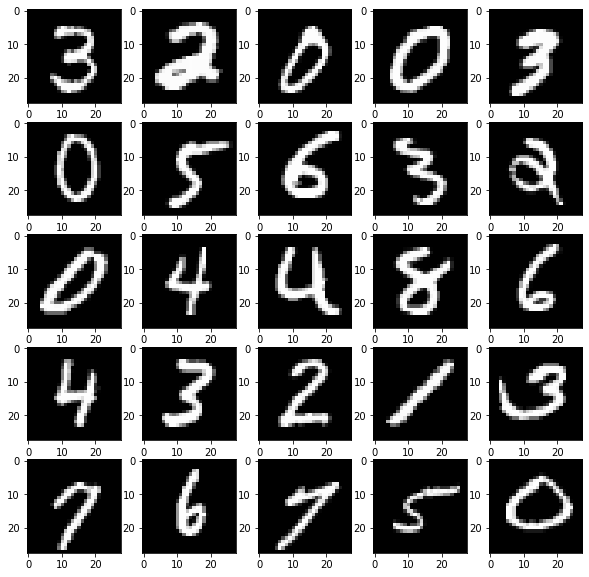

In [0]:
#실제 25개의 mnist 데이터를 화면에 출력.
plt.figure(figsize=(10,10)) #출력할 그래프 크기.
for i in range(25): #25개의 이미지만 출력
    plt.subplot(5,5,i+1)     #이미지의 위치 지정
    tmp = mnist.train.images[i].reshape(28,28) #train에서 1차원 데이터를 가져와 2차원으로 변환해 출력
    plt.imshow(tmp, cmap='gray') #데이터는 0~1로 정규화 되어 있지만 imshow 함수가 이를 0~255로 scailing 해서 출력
    #이미지 출력시 255를 곱할 필요가 없음.

In [0]:
#label이 9인 이미지만 따로 추출하여 50개의 이미지를 화면에 출력 
#이를 위해 argmax 함수와 where 함수 사용
labels =  np.argmax([[ 0 ,0, 0, 1, 0, 0] , [ 0, 1, 0, 0, 0, 0 ] ], axis=1)
#argmax 함수는 인풋 데이터중 최대값의 인덱스를 반환.
#axis가 1이기 때문에 행을 기준으로 함.
#  [ 0 0 0 1 0 0]   =>     3    (가장 큰 값 1의 인덱스 3을 리턴)
#  [ 0 1 0 0 0 0 ]  =>     1
print(labels)
labels = np.array([0,0,1,3,3,3,2,3])
print(np.where(labels == 3   )) #where함수는 조건에 맞는 값을 출력하는 함수.
#label이 3인 인덱스를 출력.

[3 1]
(array([3, 4, 5, 7]),)


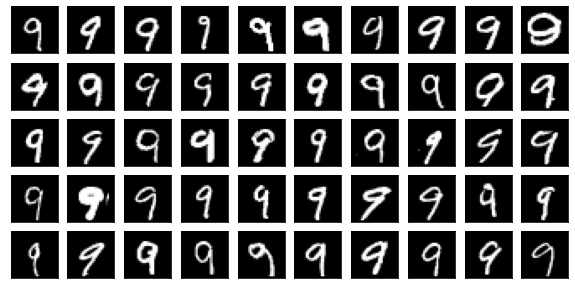

In [0]:
#argmax 함수로 트레인 데이터의 label 셋을 0~9의 레이블로 변환
#그 다음 where 함수를 이용해 레이블 값이 9인 값의 인덱스 들을 튜플로 반환.
#트레인 데이터 셋의 숫자 9의 50개 이미지를 화면에 출력.
labels =  np.argmax( mnist.train.labels, axis=1)
idx = np.where(labels == 9)    

#검색한 숫자 9 이미지 데이터의 위치를 의미하는 idx 변수를 train data set의 인덱스로 사용
#2차원으로 변환시켜 50개의 다양한 손글씨 이미지 추출
plt.figure(figsize=(10,5)) #출력할 그래프의 크기.
for i in range(50): #50개의 이미지만 출력
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tmp = mnist.train.images[idx[0][i], :].reshape(28,28)
    plt.imshow(tmp, cmap='gray')     

In [0]:
#fashion 데이터 셋 : 티셔츠 코트 스커트 등의 패션 이미지로 구성
#트레인 ,벨리데이션, 테스트로 구성
print(fashion.train.images.shape)
print(fashion.validation.images.shape)
print(fashion.test.images.shape)
print(fashion.train.labels.shape)


batch, batchy = fashion.train.next_batch(64) # 64개의 데이터를 가지고 옴 (이미지 데이터,레이블 데이터 )
print(batch.shape)
print(batchy.shape)
#2차원 행렬 (이미지 데이터 개수, 이미지 데이터 크기(28*28))
#트레인 데이터 세트의 레이블 데이터 크기(레이블 데이터 개수, 클래스의 개수)
#fashion mnist도 mini-batch를 지원하는 maxbatch 함수 제공

(55000, 784)
(5000, 784)
(10000, 784)
(55000, 10)
(64, 784)
(64, 10)


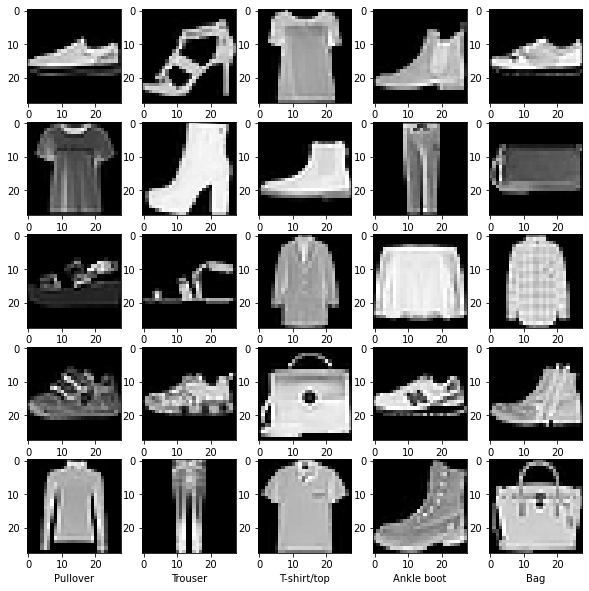

In [0]:
#실제 25개의 패션 이미지
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #각 클래스의 이름



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    tmp = fashion.train.images[i].reshape(28,28)
    plt.imshow(tmp, cmap='gray') 
    plt.xlabel(class_names[ np.argmax(fashion.train.labels[i])])

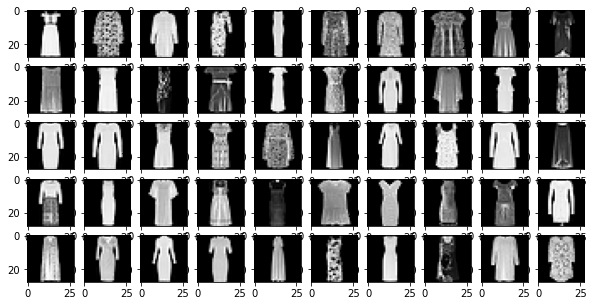

In [0]:
#레이블이 3인 드레스 이미지 50개 출력.
#argmax 함수로 트레인 데이터 셋의 레이블 데이터를 0~9의 레이블 값으로 변환
#where 함수를 이용해 레이블 값이 3인 데이터들을 튜플로 변환.
labels =  np.argmax( fashion.train.labels, axis=1)
idx = np.where(labels == 3)    #이미지 데이터를 가리키는 인덱스

plt.figure(figsize=(10,5))
for i in range(50):
    plt.subplot(5,10,i+1)
    tmp = fashion.train.images[idx[0][i], :].reshape(28,28) #2차원으로 변환해 이미지 출력
    plt.imshow(tmp, cmap='gray')    

In [0]:
#은닉층 2개, 출력층 1개로 구성
dim = 784

x = tf.placeholder(tf.float32, [None, dim]) #실제 이미지 데이터를 저장 [이미지 데이터 개수, 크기]
y = tf.placeholder(tf.int32, [None, 10]) #실제 레이블 데이터를 저장 [레이블 데이터 개수, 클래스 개수]

In [0]:
#다층 신경망 구성을 위해  함수 정의

def addLayerReLU(x, node) :    # 두개의 파라미터 x(입력,이전층의 출력 데이터) 와 node(은닉층에서 출력할 노드 개수)
    input = x.get_shape().as_list()    #x는 텐서 타입이기 때문에 shape을 이용해 입력 데이터 차원의 크기 알 수 있음
    #as_list 함수를 사용해 행과 열 크기 알 수 있음. (none, 입력 데이터 차원수)로 나옴
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node])) #w행렬에서 행은 입력층의 노드수 열은 출력할 노드수
    b = tf.Variable(tf.random_normal([node])) #출력할 노드 수 크기의 일차원 벡터
    layer = tf.nn.relu(tf.matmul(x, w) + b)     #x*w + b를 하고 활성화 함수 relu를 이용
    return layer

def addLayer0(x, node) :    
    input = x.get_shape().as_list()    
    initializer = tf.contrib.layers.xavier_initializer() #xavier 사용
    w = tf.Variable(initializer([input[1], node])) 
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.matmul(x, w) + b
    return layer

In [0]:
#함수 호출 살펴보기
layer_1 = addLayerReLU(x, 256)
layer_2 = addLayerReLU(layer_1, 256)
hypothesis = addLayer0(layer_2, 10) #출력층

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))

#계산 오차 최적화 함수로 adam 사용.
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

"""  
  softmax(hypothesis) ->   [ 0.1  0.1   0.8] (클래스 2개 샘플 2개)  -> argmax ->  [ 2 1]   
                           [ 0,1  0.6   0.3] 
                           
  y =  [ 0 0 1]     argmax ->   [ 2 0] one-hot encoding 된 것을 다시 레이블로 바꿈.
       [ 1 0 0]
  
  equal(  [2 1] ,   [2  0] )    ->  [true, false]   ->  cast(실수타입으로 캐스팅) ->   [1.0  0.0]   -> mean   -> 0.5(정확도)
  
  
""" 
#예측값과 정확도 계산
predicted = tf.argmax(tf.nn.softmax(hypothesis), 1)
compared = tf.equal(predicted , tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(compared, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



0 277.31912801228464 4.043229103088379
1 106.07194354431704 3.742327928543091
2 70.7416331457207 3.716796875
3 50.738196805585176 3.833794593811035
4 40.93139169726055 3.802861213684082
5 32.04653463704744 3.7729971408843994
6 26.253171194006427 3.7232842445373535
7 23.159654498238524 3.757535219192505
8 18.728171993274373 3.8023695945739746
9 17.101036754503184 3.8222339153289795
10 17.06421695393601 3.796557664871216
11 16.70365258039692 3.7270357608795166
12 11.872484879653712 3.739962577819824
13 12.781714682376474 3.8250765800476074
14 11.92738924869127 3.716585159301758
15 11.915865741450602 3.8290908336639404
16 12.791155008089504 3.8067803382873535
17 7.850085651025722 3.7598626613616943
18 11.7216949513641 3.71510910987854
19 7.248191274927805 3.729750394821167
20 8.63452794061888 3.7328221797943115
21 12.149860905028845 3.7758913040161133
22 6.944447289337372 3.7680184841156006
23 10.206994935398725 3.716545581817627
24 10.712008986203454 3.793351888656616
25 7.87708711024140

Text(0.5, 1.0, 'batch:50  loop:1100   time:113.29   cost:8.41295  acc:0.9803')

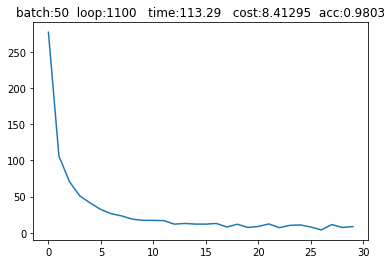

In [0]:
#mnist train 데이터를 mini-batch를 사용해 학습
#학습 하기 전 변수의 크기를 초기화

sess.run(tf.global_variables_initializer())


batch_size = 50  #batch의 크기를 1로 하면 이미지 데이터를 순서대로 하나씩 계산
total_batch = int(mnist.train.num_examples / batch_size)
#batch 크기를 50으로 설정하면 550개의 데이터 셋으로 분할
#학습시킬 데이터와 신경망 구조에 따라 적절히 선정.

ts = []
cs = []
for epoch in range(30): #전체 데이터에 대한 학습 횟수(epoch)은 30으로 설정
    total_cost = 0 #초기화
    start_time = time.time() #배치 학습을 시작한 시간을 저장
    for i in range(total_batch): #total_Batch만큼 반복
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)    #mnist train 데이터를 배치 사이즈만큼 학습
        c, _ = sess.run([cost,train], feed_dict={x: batch_xs, y: batch_ys}) #트레인 이미지 데이터, 트레인 레이블 데이터 저장.               
        #계산한 cost를 c 변수에 저장
        total_cost += c
    end_time = time.time() #배치함수 끝낸 시간을 저장
    ts.append(end_time - start_time) #ts 배치를 학습시키는데 필요한 시간
    cs.append(total_cost) #배치를 학습시키는데 필요한 누적 코스트 값
    print(epoch, total_cost, end_time - start_time)
        
a = sess.run(accuracy,  feed_dict={x: mnist.test.images, y: mnist.test.labels}) #mnist test 데이터로 정확도 계산.

print("배치크기:{}   loop:{}   미니배치 시간:{}      정확도:{}".format(batch_size,total_batch, sum(ts),a))
#배치 크기에 따라 얼마나 학습이 걸리는 지 나타남.
plt.plot(cs) #cs 리스트를 사용해 그래프 그림.
plt.title("batch:{}  loop:{}   time:{:.2f}   cost:{:.5f}  acc:{:.4f}".format(batch_size,total_batch, sum(ts), total_cost, a))

In [0]:
#드롭아웃을 적용.
#신경망 구조는 위와 동일

x = tf.placeholder(tf.float32, [None, dim])
y = tf.placeholder(tf.int32, [None, 10])

keep_prob = tf.placeholder(tf.float32) # 드랍아웃 비율을 넣음. 0.7 이면 70 가중치 30 드랍아웃

In [0]:
#다층 신경망을 쉽게 구성할 수 있도록 함수 정의
def addLayerReLU(x, node, keep_prob) :    #활성화 함수를 거친 후 drop out 하도록 수정.
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.relu(tf.matmul(x, w) + b)    #relu를 거친 결과 행렬 layer
    layer = tf.nn.dropout(layer, keep_prob)  #keep_prob를 대입.
    #출력 값중 keep_prob에 해당하는 가중치는 유지
    return layer

def addLayer0(x, node) :    
    input = x.get_shape().as_list()    
    initializer = tf.contrib.layers.xavier_initializer()
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.matmul(x, w) + b
    return layer

In [0]:
layer_1 = addLayerReLU(x, 256, keep_prob) #드롭아웃이 적용
layer_2 = addLayerReLU(layer_1, 256, keep_prob)
hypothesis = addLayer0(layer_2, 10)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))

train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

predicted = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#mnist train 데이터를 학습
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)    #train data를 batch size만큼 학습. 
        c, _ = sess.run([cost, train], feed_dict={x: batch_xs, y: batch_ys, keep_prob:0.5})  #drop out 비율 0.5
        #50% 가중치 노드를 랜덤으로 삭제해 입출력 사이의 연결을 제거.
        total_cost += c
    print(epoch, total_cost)
        
a = sess.run(accuracy,  feed_dict={x: mnist.test.images, y: mnist.test.labels,keep_prob: 1}) #1.0으로 초기화
#모든 노드를 다 연결함 (드랍 아웃 적용 x)
#학습시킨 모델을 테스트할때는 드랍아웃 적용하면 안됨!
print("정확도" ,a)

0 346.3333113193512
1 152.34417235851288
2 116.87690400704741
3 100.07565623521805
4 89.954401191324
5 79.92725746706128
6 75.06713898852468
7 67.23896963708103
8 65.64787168521434
9 62.27349022962153
10 58.79324090015143
11 57.505964297801256
12 54.29353323765099
13 53.045695080421865
14 51.09970520157367
15 49.24686609674245
16 50.75402934662998
17 46.27639210270718
18 45.02569394465536
19 43.94172806525603
20 42.01416532229632
21 43.78986663604155
22 41.68958665244281
23 37.594738733489066
24 39.21364055806771
25 38.43692186800763
26 37.77293449733406
27 39.025215204339474
28 38.55070398421958
29 34.992864227853715
정확도 0.9795


In [0]:
#mnist 데이터 셋에 softmax, minibatch adam을 사용한 뒤 위의 코드의 결과와 비교
learning_rate = 0.01
batch_size = 500

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10])) #행은 입력층의 노드수 ,열은 출력할 노드수
b = tf.Variable(tf.random_normal([10])) #출력할 노드 수 10의 1차원 벡터

In [0]:
hypothesis = tf.matmul(X, W) + b #소프트 맥스 사용.

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( #소프트 맥스를 포함한 cross entropy 사용.
    logits=hypothesis, labels=Y))

#최적화 알고리즘.
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
sess.run(tf.global_variables_initializer())

for epoch in range(30) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch #epoch 마다 평균 코스트 계산.

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))
#정확도가 조금 내려감

Epoch: 0001 cost = 2.881313004
Epoch: 0002 cost = 0.826495582
Epoch: 0003 cost = 0.613694870
Epoch: 0004 cost = 0.518031840
Epoch: 0005 cost = 0.460982921
Epoch: 0006 cost = 0.424503277
Epoch: 0007 cost = 0.394204244
Epoch: 0008 cost = 0.371219171
Epoch: 0009 cost = 0.356279877
Epoch: 0010 cost = 0.342859960
Epoch: 0011 cost = 0.330070323
Epoch: 0012 cost = 0.319806091
Epoch: 0013 cost = 0.310570821
Epoch: 0014 cost = 0.304455961
Epoch: 0015 cost = 0.299103183
Epoch: 0016 cost = 0.290224362
Epoch: 0017 cost = 0.287126710
Epoch: 0018 cost = 0.282795443
Epoch: 0019 cost = 0.278822888
Epoch: 0020 cost = 0.274809246
Epoch: 0021 cost = 0.272610319
Epoch: 0022 cost = 0.269088870
Epoch: 0023 cost = 0.266520316
Epoch: 0024 cost = 0.263558240
Epoch: 0025 cost = 0.262218939
Epoch: 0026 cost = 0.258477913
Epoch: 0027 cost = 0.259888017
Epoch: 0028 cost = 0.255768677
Epoch: 0029 cost = 0.254042615
Epoch: 0030 cost = 0.252823020
Learning Finished!
Accuracy: 0.922


In [0]:
#테스트 데이터 한개에 대해서 정답레이블과 예측 레이블 출력

r = random.randint(0, mnist.test.num_examples - 1) #0~test 이미지의 개수 -1 사이의 숫자중 하나를 랜덤하게 선택하여 저장
# mnist.test.labels[r] = > vector
# mnist.test.labels[r:r+1] = > v matrix r행의 r+1을 지정하는 거라 행렬이 됨.

#placeholder에 데이터를 넣을 때, 행렬 데이터를 공급해야 하므로 label r:r+1로 슬라이싱 함.
a = mnist.test.labels[r] 
b = mnist.test.labels[r:r+1] 

print(a.shape)
print(b.shape)

#r+1 번째 값에 대해서 레이블과 예측값을 출력.

print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1))) #one hot encoding된 값을 레이블로 변환.
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))


(10,)
(1, 10)
Label:  [5]
Prediction:  [5]


In [0]:
#트레인 데이터를 드롭아웃 미니배치 아담을 사용해 정확도 계산.
x = tf.placeholder("float", shape=[None, 784])
y = tf.placeholder("float", shape=[None, 10])

keep_prob_c = tf.placeholder(tf.float32) #onvolution 계층과 풀링 계층을 지난 다음 드랍 아웃을 적용할 때 사용
keep_prob_h = tf.placeholder(tf.float32) #다층 신경망 계층에서 은닉층을 거친 다음 드랍아웃 적용할 때 사용
#드랍아웃 값이 꼭 모든 계층에서 동일해야 하는 것은 아님.

x_image = tf.reshape(x, [-1,28,28,1]) #2차워 컨볼루션 연산을 하기 때문에 x를 4차원 데이터로 reshape
#[이미지 개수(몇개인지 모름->나중에 알아서 채워짐), 이미지 높이, 이미지 폭, 입력 채널 수(흑백이라 1)]

In [0]:
#컨볼루션 계층을 생성
def convolutionLayer(input, nfilter, keep_prob) : #입력 데이터(4차원 텐서), 필터의 개수, 드롭아웃 비율
    
    size = input.get_shape().as_list()        #입력 데이터의 shape 정보를 리스트 형태로 변환해 저장.
    nhidden = size[3]    #사이즈의 3번째 인덱스를 가져와 저장.
    # 입력 데이터가 영상일 때 입력 이미지 데이터의 채널수이거나 입력 데이터가 특징맵일 때는 이전 layer 의 필터(출력 채널 수 )수

    filter = tf.Variable(tf.truncated_normal([3, 3, nhidden, nfilter], stddev=0.1)) #필터 크기 3, 이전층의 필터 개수, 출력할 필터 개수
    b = tf.Variable(tf.constant(0.01, shape=[nfilter]))#출력할 필터 수 크기에 대한 벡터
    conv = tf.nn.relu(tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME') + b) #컨볼루션 연산 수행.
   #stride의 두번째 세번째 1은 x축과 y축으로 한픽셀씩 이동하며 필터연산 수행. 첫번째 값은 데이터에서의 이동, 네번째값은 채널에서의 이동
   #padding으로 same을 사용하여 원본 데이터 크기를 유지.
    pool = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  
    #가장 큰 값을 출력하는 max_pooling 이용, kszie = 2*2로 해서 4개의 픽셀을 하나로 생각,첫번째 값은 데이터에서의 이동, 네번째값은 채널에서의 이동
    #stride는 x축과 y축을 2칸씩 이동.
    #이 경우 pooling 계층 지나면 원본 데이터의  크기가 2배로 줄어듬.
    pool_drop = tf.nn.dropout(pool, keep_prob)
    
    return pool_drop

In [0]:
#다층 신경망 계층을 함수로 정리.
def fullconnectedLayer(pool, nhidden, keep_prob) :
    size = pool.get_shape().as_list()    
    #2차원 데이터를 1차원으로 변환. 컨볼루션 계층이 여러개 사용될 수 있기 때문에 크기를 미리 계산함. 
    flatten =  size[1] *  size[2] * size[3] #1차원 데이터 크기 : 입력 데이터 높이와 폭, 이전층의 필터 개수를 곱한 값
    
    #풀링 계층과 다층 신경망 은닉층 사이의 변수 정의
    w_fc = tf.Variable(tf.truncated_normal([flatten, nhidden], stddev=0.1)) #랜덤 노말함수 초기화. [1차원 데이터 크기, 은닉층 노드 개수]
    b_fc = tf.Variable(tf.constant(0.01, shape=[nhidden])) #0.01로 초기화, 은닉층의 노드 수 크기의 1차원 벡터
    h_flatten = tf.reshape(pool, [-1, flatten])
    h_fc = tf.nn.relu(tf.matmul(h_flatten, w_fc) + b_fc)
    #은닉층을 거친 후 드롭아웃
    h_fc_drop = tf.nn.dropout(h_fc, keep_prob)
    return  h_fc_drop    

In [0]:
#출력층 함수 정의
def outputLayer(h_fc_drop, nclass) :   
    
    size = h_fc_drop.get_shape().as_list()        
    nhidden = size[1]
    w_fc = tf.Variable(tf.truncated_normal([nhidden, nclass], stddev=0.1))
    b_fc = tf.Variable(tf.constant(0.01, shape=[nclass]))
    logits = tf.matmul(h_fc_drop, w_fc) + b_fc
    return  logits

In [0]:
#컨볼루션 신경망 구조: 컨볼루션 계층 2개, 풀링 계층 2개, 다층 신경망에서 은닉층 1개 출력층 1개
h_pool1 = convolutionLayer(x_image, 32, keep_prob_c) #첫번째 컨볼루션 계층의 필터수 = 32개, 드롭아웃 적용
h_pool2 = convolutionLayer(h_pool1, 64, keep_prob_c) 
h_fc1_drop = fullconnectedLayer(h_pool2, 1024, keep_prob_h) #다층 신경망의 노드수가 1024인 은닉층을 거친후 드롭아웃 적용
logits = outputLayer(h_fc1_drop, 10) #노드수가 클래스 수만큼 구성.

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(0.001).minimize(cost)


prediction = tf.equal(tf.argmax(tf.nn.softmax(logits),1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

In [0]:
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

total_cost = 0
for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)    
    _, c = sess.run([train, cost], feed_dict={x: batch_xs, y: batch_ys, keep_prob_c:0.8, keep_prob_h:0.5})                
    total_cost += c
a = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob_c: 1.0, keep_prob_h:1.0})
#드릅아웃을 적용 안하려고 1.0 설정.
print("accuracy=%g"% (a))
#성능이 98% 정도 나옴.

accuracy=0.9836


In [0]:
#epoch 15번 실행해서 성능 체크.
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)    
        _, c = sess.run([train, cost], feed_dict={x: batch_xs, y: batch_ys, keep_prob_c:0.8, keep_prob_h:0.5})                
        total_cost += c
    a = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob_c: 1.0, keep_prob_h:1.0})
    print("%d  cost=%g    accuracy=%g"% (epoch, total_cost, a))
#성능이 99% 정도 나옴.

In [0]:
hypothesis = tf.nn.softmax(logits)
predicted = tf.argmax(hypothesis, 1)


confusion_matrix = tf.confusion_matrix(labels=tf.argmax(y,1), predictions=predicted, num_classes=10)    
cm = sess.run(confusion_matrix, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob_c: 1.0, keep_prob_h:1.0})

print(cm )

[[ 972    0    1    1    0    2    2    1    1    0]
 [   0 1119    5    0    0    2    4    0    5    0]
 [   0    0 1025    0    0    0    1    4    2    0]
 [   0    0    1  996    0    8    0    2    2    1]
 [   0    0    2    0  959    0    3    0    2   16]
 [   1    0    0    2    0  887    1    1    0    0]
 [   5    1    0    0    3    7  941    0    1    0]
 [   0    1   17    4    0    0    0 1000    1    5]
 [   4    0    2    4    1    2    0    1  951    9]
 [   2    4    1    2    4    3    0    6    1  986]]


In [0]:
#fashion 데이터 셋의 트레인 데이터 학습 후 테스트 데이터를 이용해 정확도 출력
X = tf.placeholder(tf.float32, [None, 784]) #28*28
Y = tf.placeholder(tf.float32, [None, 10]) #클래스 개수 = 10

W = tf.Variable(tf.random_normal([784, 10])) #[입력층 노드수, 출력할 노드 수]
b = tf.Variable(tf.random_normal([10])) #출력할 노드 수 크기의 1차원 벡터

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [0]:
sess.run(tf.global_variables_initializer())

batch_size = 500
total_batch = int(fashion.train.num_examples / batch_size)


for epoch in range(15):
    avg_cost = 0    
    for i in range(total_batch):
        batch_xs, batch_ys = fashion.train.next_batch(batch_size)#트레인 데이터 셋에서 넣어준 배치 사이즈만큼 데이터를 랜덤으로 가져옴.
        #트레인 이미지 데이터, batch_ys= 트레인 레이블 데이터
        c, _ = sess.run([cost, train], feed_dict = {X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

#학습 완료후 fashion test 데이터로 실행해서 정확도 알아봄
print('Accuracy:', sess.run(accuracy, feed_dict={X: fashion.test.images, Y: fashion.test.labels}))
#정확도 = 0.7245

Epoch: 0001 cost = 9.600020556
Epoch: 0002 cost = 3.854450434
Epoch: 0003 cost = 2.964376887
Epoch: 0004 cost = 2.563478123
Epoch: 0005 cost = 2.270277941
Epoch: 0006 cost = 2.044644431
Epoch: 0007 cost = 1.866727554
Epoch: 0008 cost = 1.723365441
Epoch: 0009 cost = 1.602137029
Epoch: 0010 cost = 1.505127029
Epoch: 0011 cost = 1.421826269
Epoch: 0012 cost = 1.349532717
Epoch: 0013 cost = 1.288197422
Epoch: 0014 cost = 1.233344545
Epoch: 0015 cost = 1.187006718
Accuracy: 0.7245


In [0]:
#트레인데이터를 다층 신경망 미니배치 아담  신경망을 이용해 학습
X = tf.placeholder('float', [None, 784])
Y = tf.placeholder('float', [None, 10])

def addLayerReLU(x, node) :    
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.relu(tf.matmul(x, w) + b)    
    return layer

def addLayer0(x, node) :    
    input = x.get_shape().as_list()    
    initializer = tf.contrib.layers.xavier_initializer()
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.matmul(x, w) + b
    return layer

In [0]:
layer_1 = addLayerReLU(X, 1024)
layer_2 = addLayerReLU(layer_1,1024)
hypothesis = addLayer0(layer_2, 10)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
train = tf.train.AdamOptimizer(0.001).minimize(cost) 

prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

In [0]:
sess.run(tf.initialize_all_variables())

batch_size = 100
total_batch = int(fashion.train.num_examples/batch_size)

for epoch in range(15):
    avg_cost = 0.
    for step in range(total_batch):
        batch_xs, batch_ys = fashion.train.next_batch(batch_size)
        c, _ = sess.run([cost, train], feed_dict = {X: batch_xs, Y: batch_ys})
        avg_cost += c/total_batch
    print("Epoch:", '%04d' %(epoch+1), "cost=", "{:.9f}".format(avg_cost))

#test 데이터로 정확도를 계산
print ("Accuracy:", sess.run(accuracy, {X: fashion.test.images, Y: fashion.test.labels})) 
#최종 정확도가 0.89 정도 나옴.
#위의 soft max 사용했을 때보다 다층 신경망 사용한 게 더 높음

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 0.522135974


KeyboardInterrupt: ignored

In [0]:
#fashion 데이터 셋의 train 데이터를 드롭아웃 하고 테스트 데이터로 정확도를 출력.
x = tf.placeholder("float", shape=[None, 784])
y = tf.placeholder("float", shape=[None, 10])

keep_prob = tf.placeholder(tf.float32)

x_image = tf.reshape(x, [-1,28,28,1])

In [0]:
def convolutionLayer(input, nfilter) :
    
    size = input.get_shape().as_list()        
    nhidden = size[3] 

    w_conv = tf.Variable(tf.truncated_normal([3, 3, nhidden, nfilter], stddev=0.1))
    b_conv = tf.Variable(tf.constant(0.01, shape=[nfilter]))
    h_conv = tf.nn.relu(tf.nn.conv2d(input, w_conv, strides=[1, 1, 1, 1], padding='SAME') + b_conv)
    h_pool = tf.nn.max_pool(h_conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    return h_pool

def fullconnectedLayer(h_pool, nhidden, keep_prob) :
    size = h_pool.get_shape().as_list()    
    flatten =  size[1] *  size[2] * size[3]
    
    w_fc = tf.Variable(tf.truncated_normal([flatten, nhidden], stddev=0.1))
    b_fc = tf.Variable(tf.constant(0.001, shape=[nhidden]))
    h_pool_flat = tf.reshape(h_pool, [-1, flatten])
    h_fc = tf.nn.relu(tf.matmul(h_pool_flat, w_fc) + b_fc)
    h_fc_drop = tf.nn.dropout(h_fc, keep_prob)
    return  h_fc_drop    
  
def outputLayer(h_fc_drop, nclass) :    
    
    #h_fc1_drop = [None, 100]
    size = h_fc_drop.get_shape().as_list()        
    nhidden = size[1]
    w_fc = tf.Variable(tf.truncated_normal([nhidden, nclass], stddev=0.1))
    b_fc = tf.Variable(tf.constant(0.01, shape=[nclass]))
    logits = tf.matmul(h_fc_drop, w_fc) + b_fc
    return  logits

In [0]:
h_pool1 = convolutionLayer(x_image, 32)
h_pool2 = convolutionLayer(h_pool1, 64)
h_fc1_drop = fullconnectedLayer(h_pool2, 1024, keep_prob)
logits = outputLayer(h_fc1_drop, 10)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(0.001).minimize(cost)


prediction = tf.equal(tf.argmax(tf.nn.softmax(logits),1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

In [0]:
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(fashion.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = fashion.train.next_batch(batch_size)    
        _, c = sess.run([train, cost], feed_dict={x: batch_xs, y: batch_ys, keep_prob:0.5})                
        total_cost += c
    a = sess.run(accuracy, feed_dict={x: fashion.test.images, y: fashion.test.labels, keep_prob:1.0})
    print("%d  cost=%g    accuracy=%g"% (epoch, total_cost, a))
#드롭아웃을 수행하니 최종 정확도가 92%정도 나오는 것을 알 수 있음.